In [35]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

# Fetch daily data for 4 years, for 7 major currency pairs
TRADING_INSTRUMENT = 'CADUSD=X'
SYMBOLS = ['AUDUSD=X', 'GBPUSD=X', 'CADUSD=X', 'CHFUSD=X', 'EURUSD=X', 'JPYUSD=X', 'NZDUSD=X']
START_DATE = '2016-01-01'
END_DATE = '2021-01-01'

# DataSeries for each currency
symbols_data = {}

for symbol in SYMBOLS:
    SRC_DATA_FILENAME = symbol + '_data.pkl'

    try:
        symbol_data = pd.read_pickle(SRC_DATA_FILENAME)
    except:
        symbol_data = data.DataReader(symbol, 'yahoo', START_DATE, END_DATE)
        symbol_data.to_pickle(SRC_DATA_FILENAME)
    
    symbols_data[symbol] = symbol_data


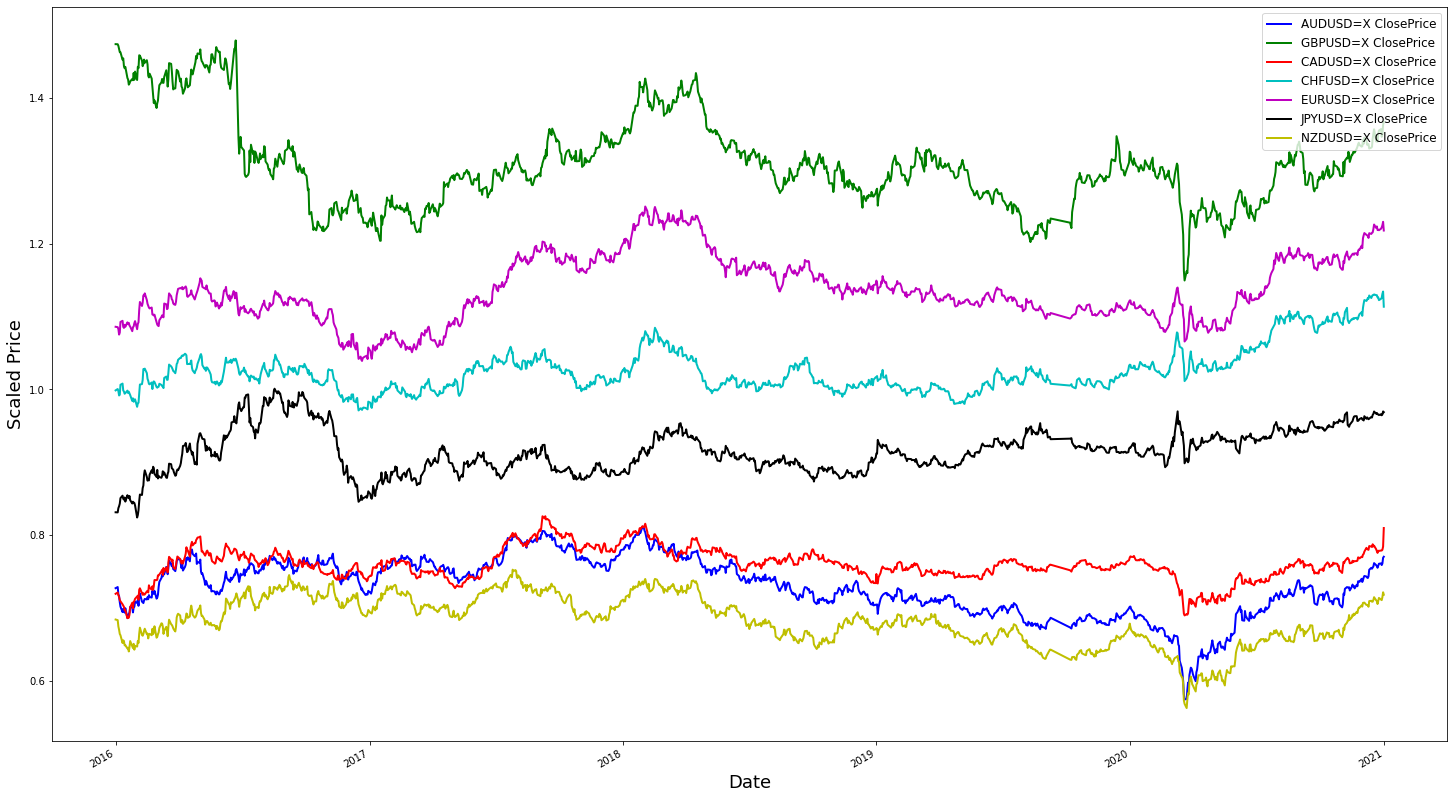

In [36]:
cycol = cycle('bgrcmky')

price_data = pd.DataFrame()

for symbol in SYMBOLS:
    multiplier = 1.0
    if symbol == 'JPYUSD=X':
        multiplier = 100.0
    
    label = symbol + ' ClosePrice'
    price_data = price_data.assign(label=pd.Series(symbols_data[symbol]['Close'] * multiplier, index=symbols_data[symbol].index))
    ax = price_data['label'].plot(color=next(cycol), lw=2., label=label)

plt.rcParams['figure.figsize'] = (25, 15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Scaled Price', fontsize=18)
plt.legend(prop={'size': 12})
plt.show()
